In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


In [2]:
sns.set(style='white', context='poster', rc={'figure.figsize':(10,8)})

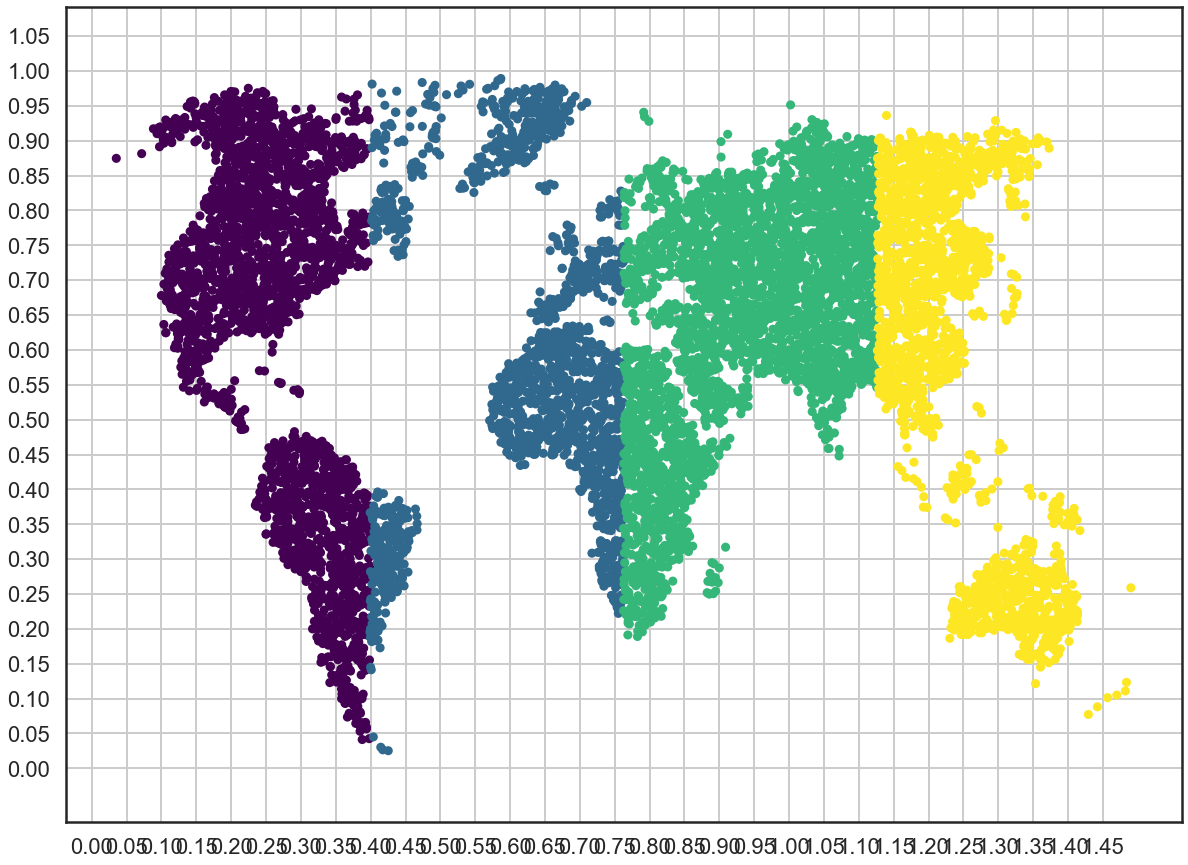

In [3]:
from matplotlib.image import imread

N = 10000

    
data = imread('trial.jpg')[::-1, :, 0].T
rng = np.random.RandomState(123)
X = rng.rand(4 * N, 2)
i, j = (X * data.shape).astype(int).T
mask = (data[i, j] < 1)
X = X[mask]
X[:, 0] *= (data.shape[0] / data.shape[1])
X = X[:N]
X = X[np.argsort(X[:, 0])]
fig, ax = plt.subplots(figsize=(20,15))
ax.set_xticks(np.arange(0,1.5,0.05))
ax.set_yticks(np.arange(0, 1.25, 0.05))
plt.scatter(X[:, 0], X[:, 1], c = X[:, 0], cmap = plt.cm.get_cmap('viridis', 4), s = 50)
plt.axis('equal');
plt.grid()

In [4]:
df = pd.DataFrame(X, columns=['X','Y'])
df['Target'] = 4
df

,X,Y,Target
0,0.035236,0.874708,4
1,0.071606,0.881432,4
2,0.088452,0.917105,4
3,0.093668,0.910102,4
4,0.095442,0.918197,4
...,...,...,...
9995,1.456835,0.101339,4
9996,1.469933,0.105002,4
9997,1.482261,0.110856,4
9998,1.483827,0.123269,4


In [5]:
for i in range(0,10000):
    if (df.iloc[i,0]<0.55) and (df.iloc[i,1]>0.5):
        df.iloc[i,2] = 0
    elif (df.iloc[i,0]<0.7) and (df.iloc[i,1]>0.80):
        df.iloc[i,2] = 0
    elif (df.iloc[i,0]<0.55) and (df.iloc[i,1]<0.50):
        df.iloc[i,2] = 1
    elif (df.iloc[i,0]<0.84) and (df.iloc[i,1]<0.64):
        df.iloc[i,2] = 2
    elif (df.iloc[i,0]<0.95) and (df.iloc[i,1]<0.475):
        df.iloc[i,2] = 2
    elif (df.iloc[i,0]>1.2) and (df.iloc[i,1]<0.4):
        df.iloc[i,2] = 4
    else:
        df.iloc[i,2] = 3
df

,X,Y,Target
0,0.035236,0.874708,0
1,0.071606,0.881432,0
2,0.088452,0.917105,0
3,0.093668,0.910102,0
4,0.095442,0.918197,0
...,...,...,...
9995,1.456835,0.101339,4
9996,1.469933,0.105002,4
9997,1.482261,0.110856,4
9998,1.483827,0.123269,4


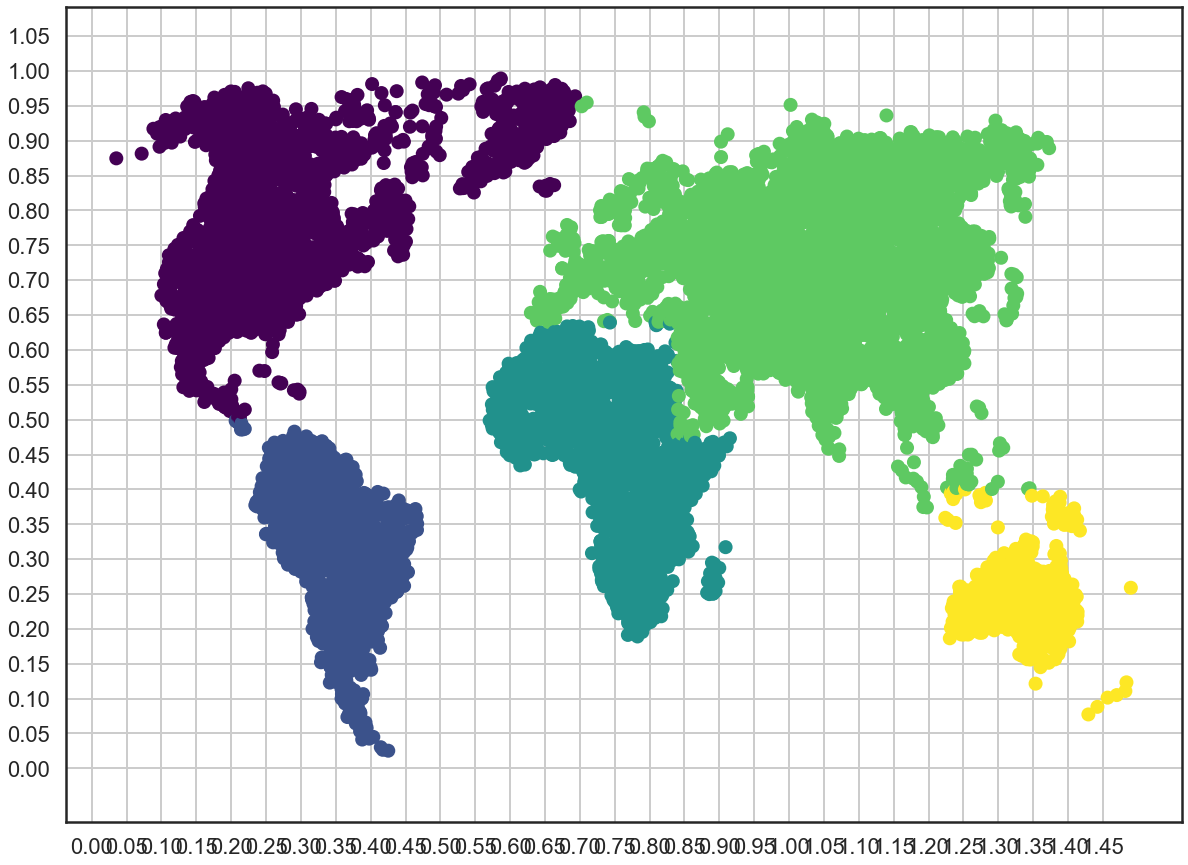

In [6]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_xticks(np.arange(0,1.5,0.05))
ax.set_yticks(np.arange(0, 1.25, 0.05))
plt.scatter(df['X'], df['Y'], c = df['Target'], cmap = 'viridis')#, cmap = plt.cm.get_cmap('viridis', 5), s = 50)
plt.axis('equal');
plt.grid()

In [34]:
df.to_pickle('world_data.pkl')

In [7]:
#X = df.iloc[:,0:2]
y = df.iloc[:,2]
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


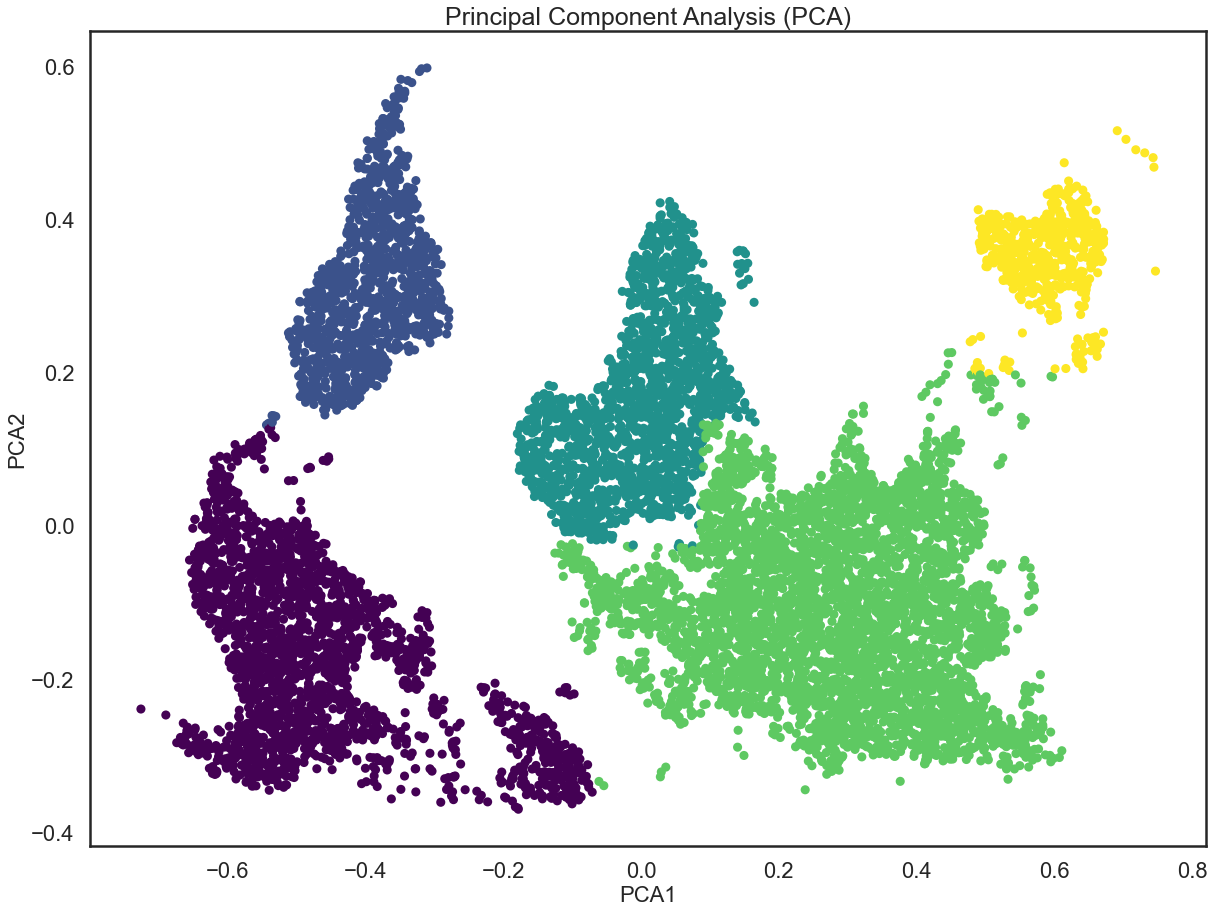

In [8]:
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.figure(figsize=(20,15))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y, s = 50, cmap = 'viridis')
plt.title('Principal Component Analysis (PCA)', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22)
plt.ylabel("PCA2", fontsize = 22)
plt.show()

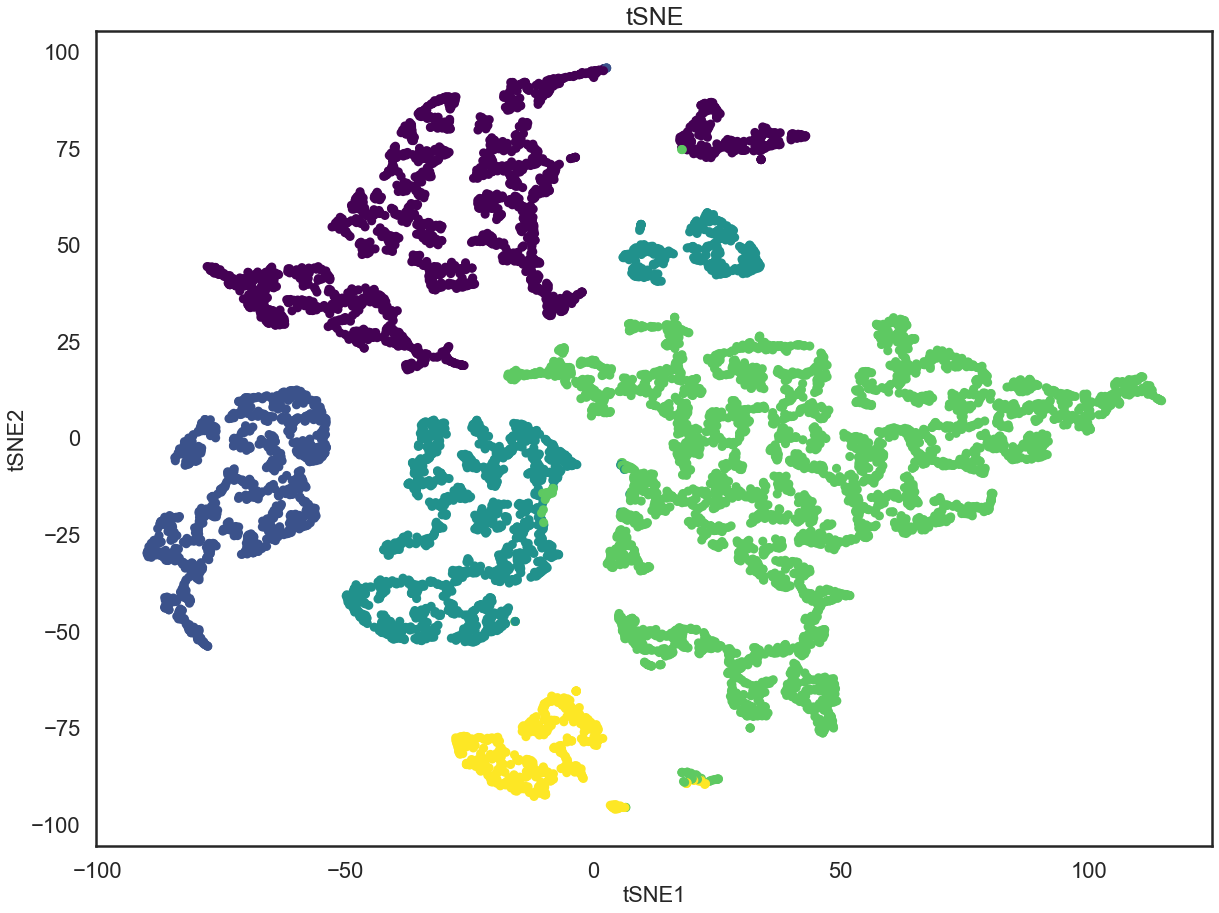

In [9]:

model = TSNE()
tsne = model.fit_transform(X)
plt.figure(figsize = (20,15))
plt.scatter(tsne[:, 0], tsne[:, 1], c = y, s = 50, cmap = 'viridis')
plt.title('tSNE', fontsize = 25); plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)
plt.show()

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False,
     init=array([[0.03523644, 0.87470843],
       [0.07160559, 0.88143231],
       [0.0884525 , 0.91710492],
       ...,
       [1.48226058, 0.11085575],
       [1.48382712, 0.12326919],
       [1.49011849, 0.25890489]]),
     learning_rate=1, local_connectivity=1.0, low_memory=False,
     metric='euclidean', metric_kwds=None, min_dist=1, n_components=2,
     n_epochs=1000, n_neighbors=500, negative_sample_rate=5,
     output_metric='euclidean', output_metric_kwds=None, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, unique=False, verbose=2)
Construct fuzzy simplicial set
Wed Aug 12 11:20:51 2020 Finding Nearest Neighbors
Wed Aug 12 11:20:51 2020 Building RP forest with 10 trees
Wed Aug 12 11:20:51 2020 NN descen

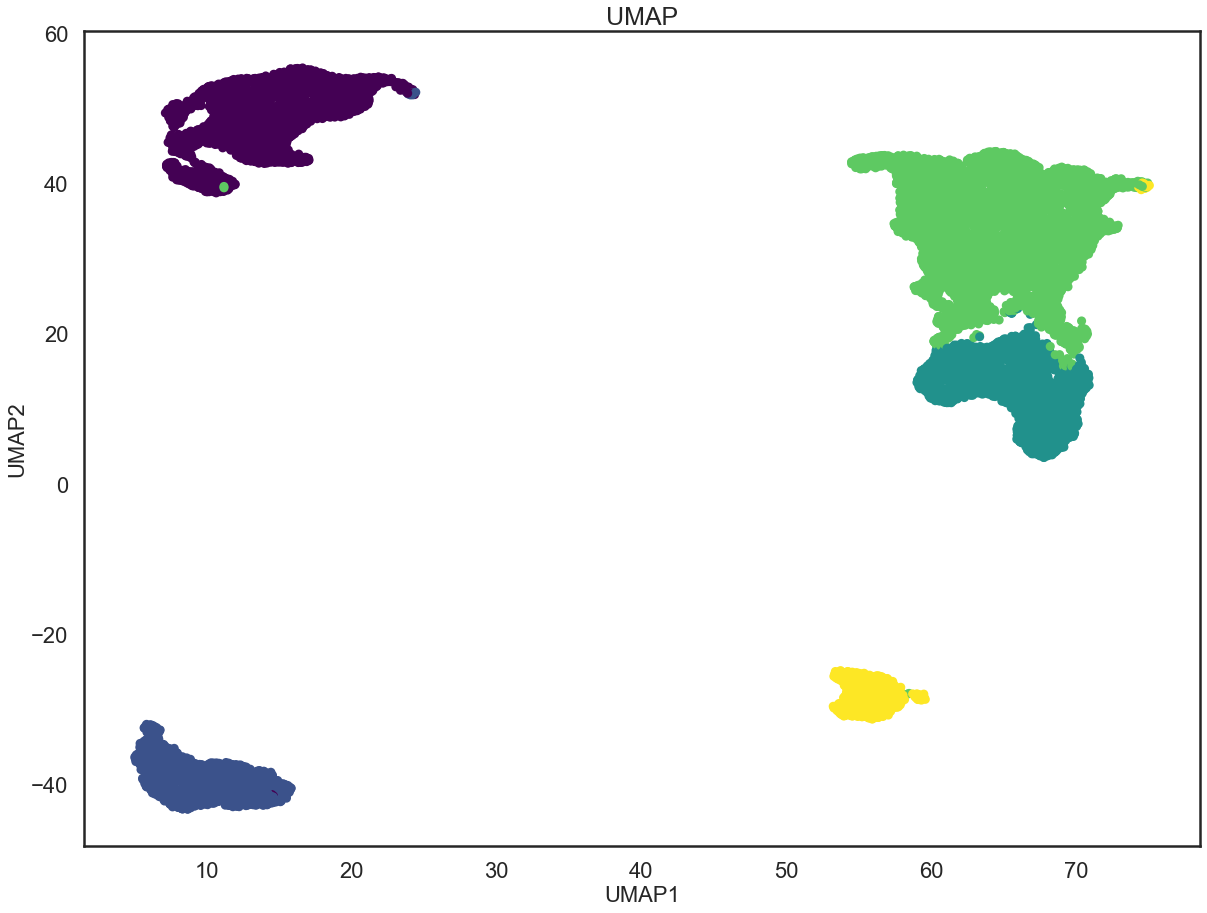

In [14]:
reducer = umap.UMAP(learning_rate = 1, n_components = 2, min_dist = 1, n_neighbors = 500, 
             init = X, n_epochs = 1000, verbose = 2)
embed = reducer.fit_transform(X)
plt.figure(figsize=(20,15))
plt.scatter(embed[:, 0], embed[:, 1], c = y, s = 50,cmap = 'viridis')
plt.title('UMAP', fontsize = 25); plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)
plt.show()

In [17]:
z_3d = X[:, 1]
#x_3d = X[:, 0] * np.cos(X[:, 0])
#y_3d = X[:, 0] * np.sin(X[:, 0])
x_3d = []
y_3d = []
for i in range(0,10000):
    x_3d.append((max(X[:,0]/(2*np.pi))*np.sin((2*np.pi*X[i,0])/(max(X[:,0])))))
    y_3d.append((max(X[:,0]/(2*np.pi))*(1-np.cos((2*np.pi*X[i,0])/(max(X[:,0]))))))

X_3d = np.array([x_3d, y_3d, z_3d]).T
X_3d.shape


(10000, 3)

In [23]:
tr = pd.DataFrame(X_3d)
tr['3'] =y
tr[]

,0,1,2,3
0,3.510694e-02,0.002613,0.874708,0
1,7.052259e-02,0.010728,0.881432,0
2,8.641604e-02,0.016305,0.917105,0
3,9.125135e-02,0.018258,0.910102,0
4,9.288637e-02,0.018947,0.918197,0
...,...,...,...,...
9995,-3.317442e-02,0.002332,0.101339,4
9996,-2.016077e-02,0.000858,0.105002,4
9997,-7.856473e-03,0.000130,0.110856,4
9998,-6.290641e-03,0.000083,0.123269,4


'temp-plot.html'

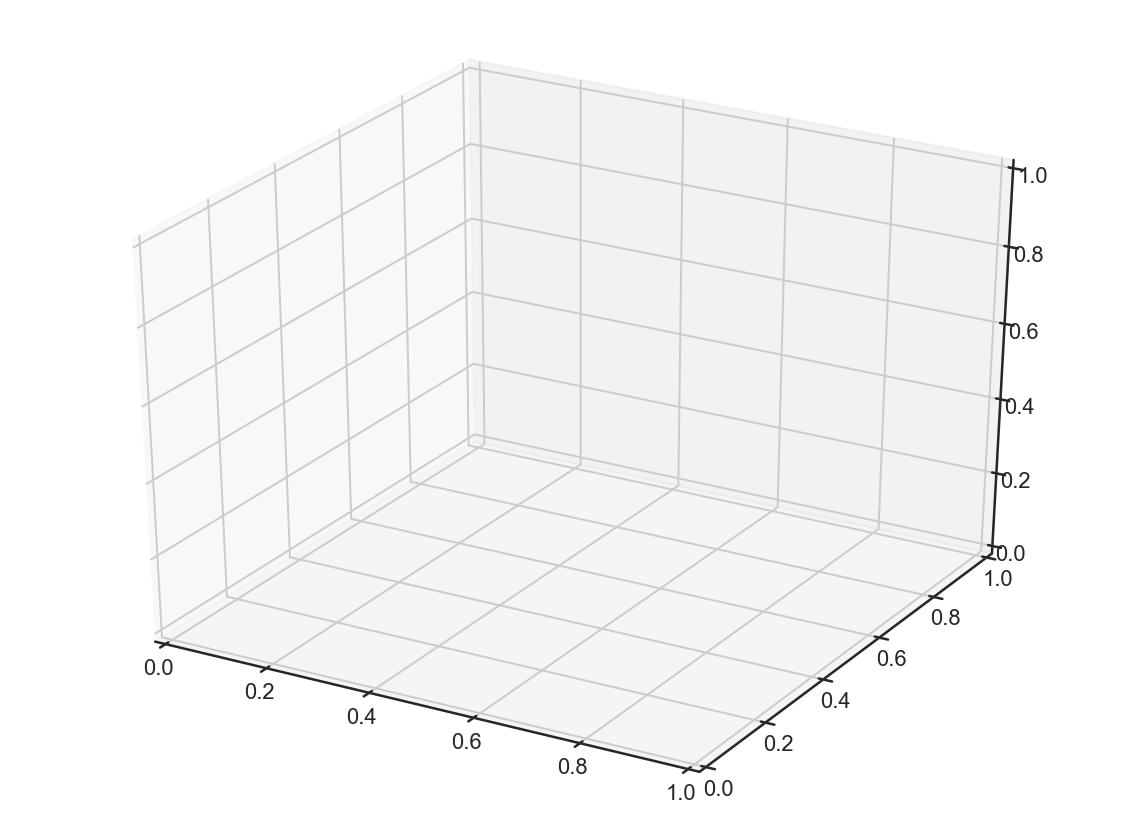

In [36]:
from mpl_toolkits import mplot3d
import plotly
plt.figure(figsize=(20,15))
ax = plt.axes(projection = '3d')
fig = px.scatter_3d(tr, x= 0, y=1, z= 2, color = tr['3'] )
plotly.offline.plot(fig)

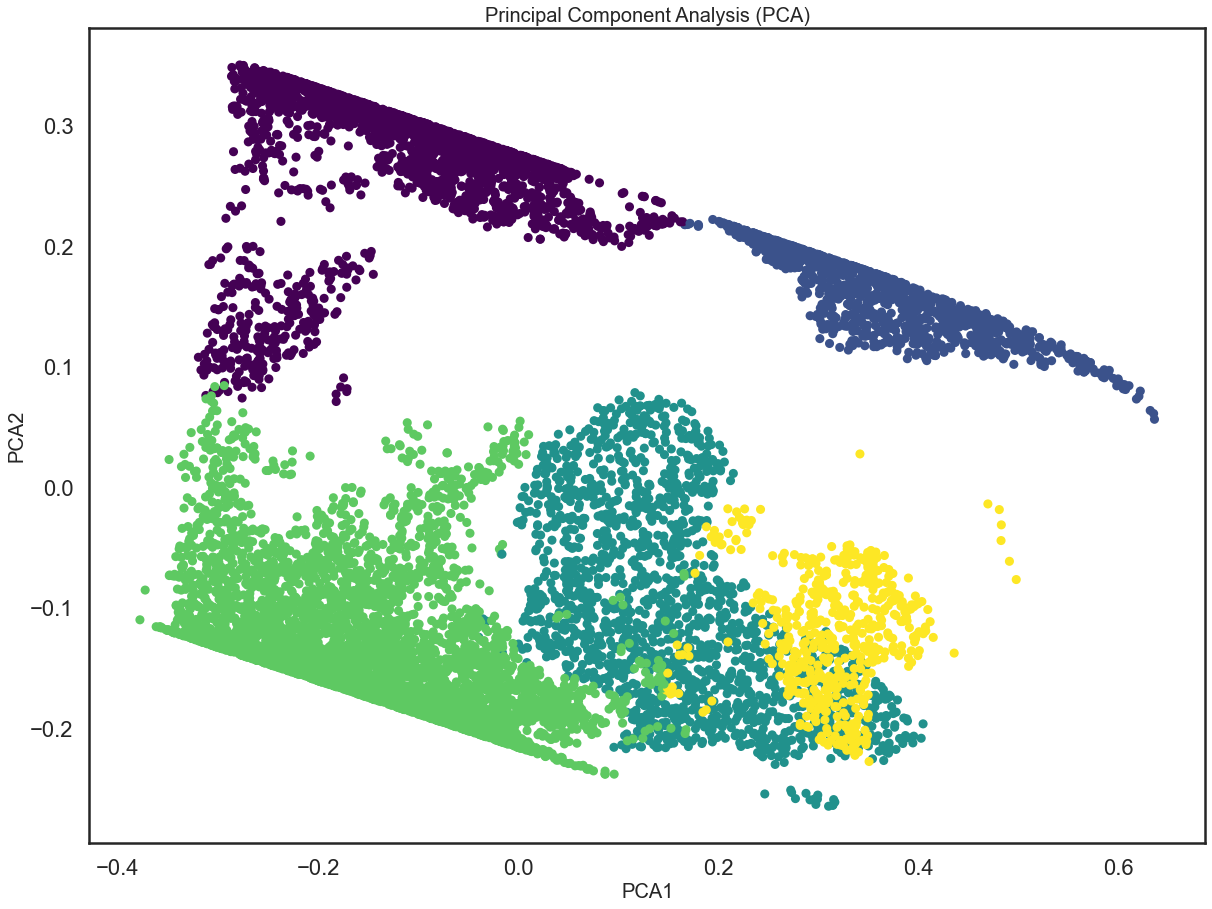

In [39]:
X_3d_reduced = PCA(n_components = 2).fit_transform(X_3d)
plt.figure(figsize=(20,15))
plt.scatter(X_3d_reduced[:, 0], X_3d_reduced[:, 1], c = y, s = 50, cmap = 'viridis')
plt.title('Principal Component Analysis (PCA)', fontsize = 20)
plt.xlabel("PCA1", fontsize = 20); plt.ylabel("PCA2", fontsize = 20)
plt.show()

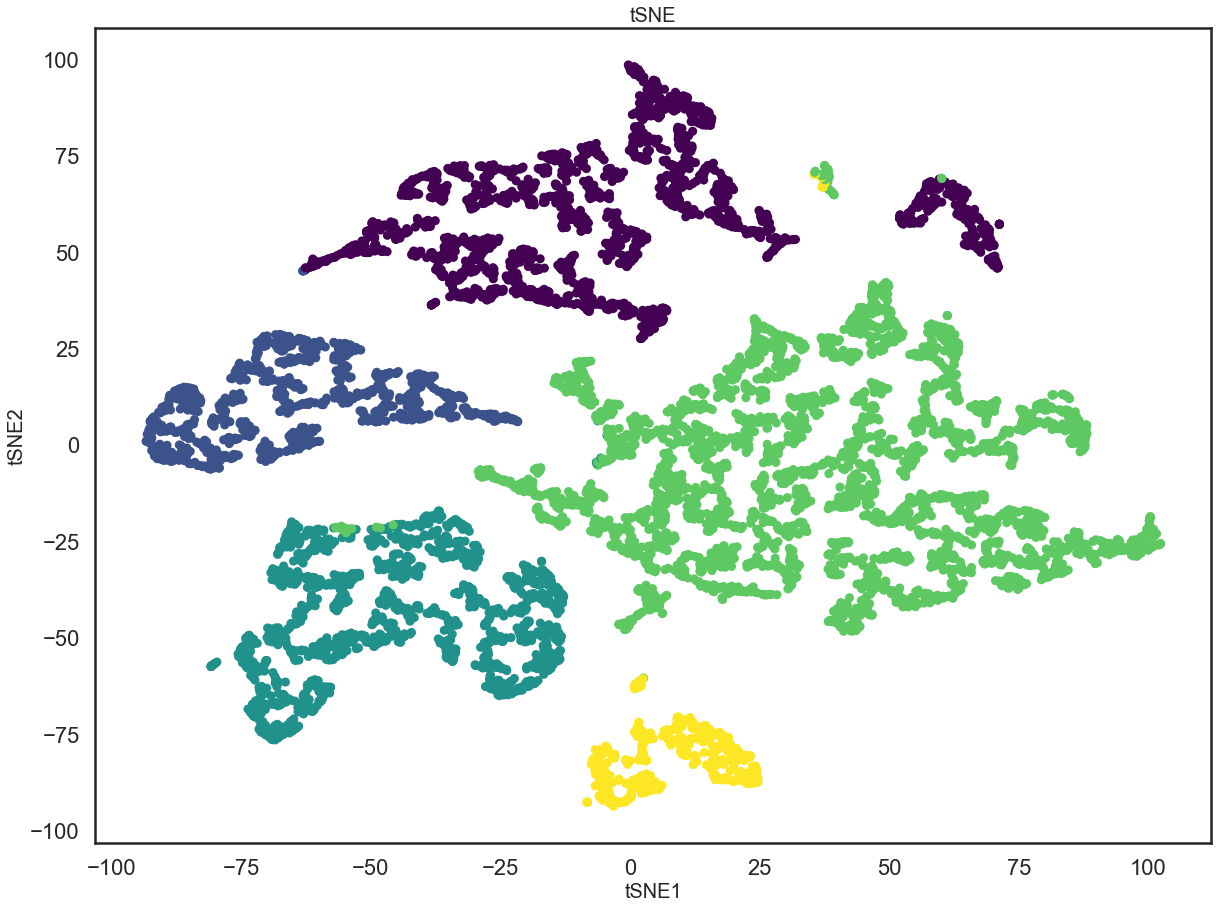

In [40]:
model = TSNE()
tsne = model.fit_transform(X_3d)
plt.figure(figsize=(20,15))
plt.scatter(tsne[:, 0], tsne[:, 1], c = y, s = 50,cmap= 'viridis')
plt.title('tSNE', fontsize = 20); plt.xlabel("tSNE1", fontsize = 20); plt.ylabel("tSNE2", fontsize = 20)
plt.show()

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False,
     init=array([[-0.23714493,  0.22081617],
       [-0.23313083,  0.25063367],
       [-0.26253431,  0.27190364],
       ...,
       [ 0.48071029, -0.01831816],
       [ 0.46929698, -0.01363322],
       [ 0.34143183,  0.02785506]]),
     learning_rate=1, local_connectivity=1.0, low_memory=False,
     metric='euclidean', metric_kwds=None, min_dist=1, n_components=2,
     n_epochs=1000, n_neighbors=500, negative_sample_rate=5,
     output_metric='euclidean', output_metric_kwds=None, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, unique=False, verbose=2)
Construct fuzzy simplicial set
Wed Aug 12 12:20:32 2020 Finding Nearest Neighbors
Wed Aug 12 12:20:32 2020 Building RP forest with 10 trees
Wed Aug 12 12:20:32 20

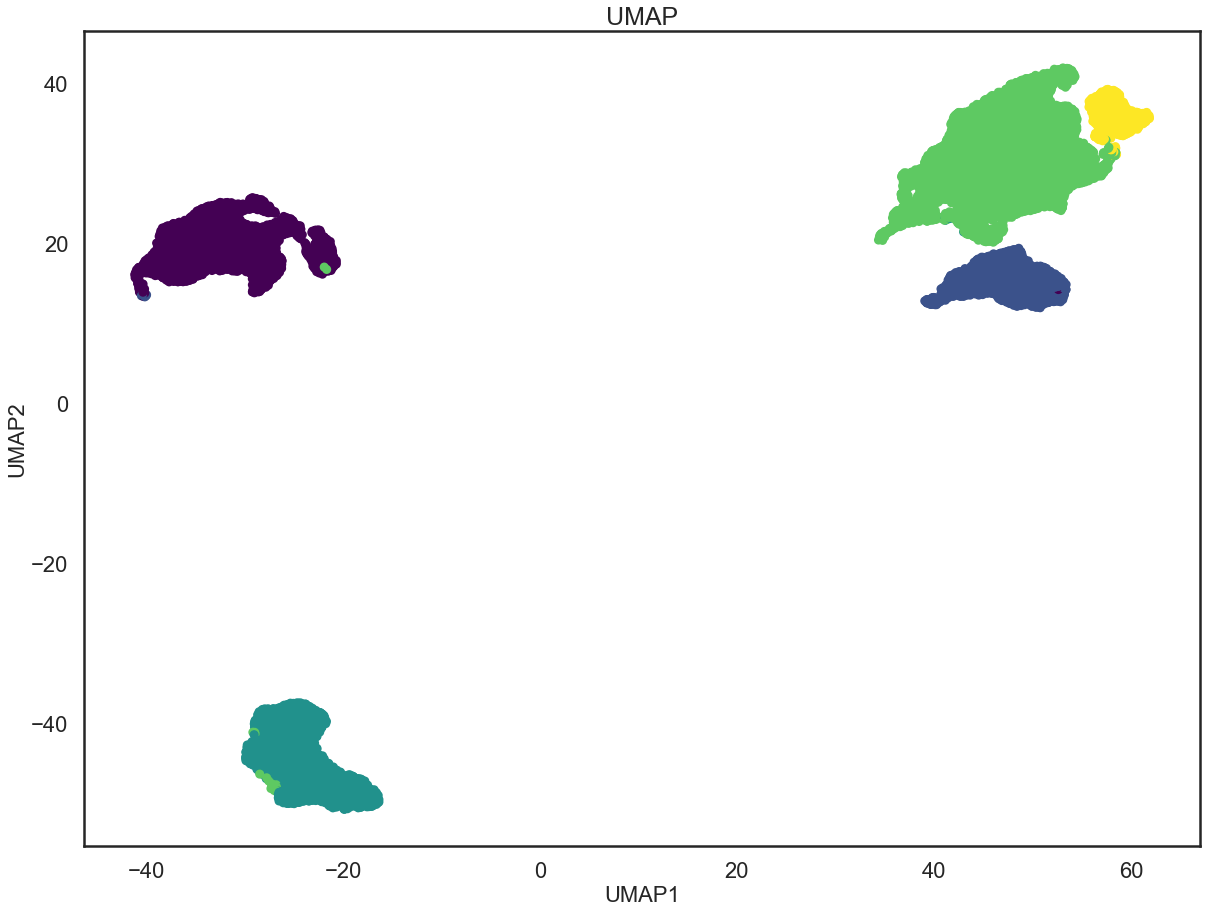

In [44]:
reducer = umap.UMAP(learning_rate = 1, n_components = 2, min_dist = 1, n_neighbors = 500, 
             init = X_3d_reduced, n_epochs = 1000, verbose = 2)
embed = reducer.fit_transform(X_3d)
plt.figure(figsize=(20,15))
plt.scatter(embed[:, 0], embed[:, 1], c = y, s = 50,cmap='viridis')
plt.title('UMAP', fontsize = 25); plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)
plt.show()